(Bonus) Build a generative model like VAE or GAN that would predict thickness profile for the whole wafer at once. For that you would need to convert site data to images using interpolation. Explain how you would assess the quality of interpolation.

In [ ]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

In [2]:
DF = pd.read_csv("site_coordinates.csv")
DF

,site,SITE_X,SITE_Y
0,0,-49000.00,0.00
1,1,0.00,0.00
2,2,0.00,49000.00
3,3,-34648.20,34648.20
4,4,-34648.20,-34648.20
5,5,-0.00,-49000.00
6,6,34648.20,-34648.20
7,7,49000.00,-0.00
8,8,34648.20,34648.20
9,9,0.00,98000.00


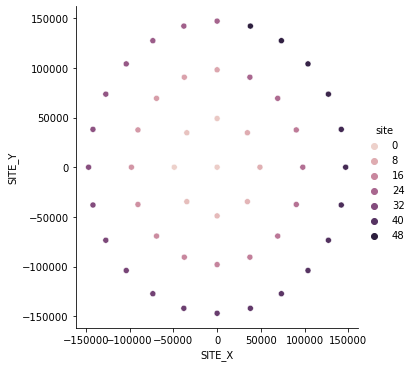

In [3]:
#plot of the coordinates
import seaborn as sns
sns.relplot(
    data=DF,
    x="SITE_X", y="SITE_Y", hue="site"
)

In [4]:
#Prespocessing of dataframe to get one column per image
DF2 = pd.read_csv ('test_assignment_sim.csv')
DF2 = DF2.transpose()
DF2=DF2.iloc[4:] 
DF2
DF2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, SITE_0 to SITE_48
Columns: 500 entries, 0 to 499
dtypes: float64(500)
memory usage: 191.8+ KB


In [5]:
DF2

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
SITE_0,1601.80,1516.41,1478.10,1550.29,1544.88,1489.34,1493.26,1532.50,1510.84,1459.39,...,1485.59,1518.81,1616.07,1555.17,1515.37,1579.68,1506.29,1433.89,1385.06,1418.94
SITE_1,1556.67,1495.08,1457.37,1529.62,1495.16,1446.93,1461.37,1480.94,1455.55,1427.28,...,1452.74,1484.62,1574.37,1519.94,1469.54,1554.13,1444.28,1401.30,1355.17,1395.91
SITE_2,1597.90,1516.48,1483.95,1548.35,1549.02,1481.04,1491.91,1526.42,1509.43,1457.44,...,1490.06,1521.22,1616.05,1557.49,1517.66,1582.13,1505.73,1441.60,1387.31,1417.04
SITE_3,1599.79,1516.37,1481.34,1549.93,1547.83,1483.99,1492.47,1531.46,1509.45,1456.00,...,1487.82,1520.01,1617.10,1556.11,1515.78,1581.75,1505.71,1437.74,1384.32,1418.31
SITE_4,1601.08,1516.92,1475.52,1549.70,1544.25,1490.71,1491.99,1533.66,1511.44,1463.61,...,1483.41,1517.60,1617.45,1554.10,1519.15,1578.54,1506.87,1430.92,1384.61,1418.55
SITE_5,1601.12,1514.84,1472.94,1549.24,1543.62,1492.64,1491.56,1533.43,1508.85,1468.59,...,1480.32,1518.90,1620.04,1552.67,1523.88,1576.17,1507.44,1428.49,1382.56,1418.19
SITE_6,1592.00,1503.49,1490.16,1542.96,1546.11,1480.21,1492.07,1516.85,1511.90,1459.87,...,1495.81,1522.69,1610.13,1552.60,1528.94,1583.28,1507.24,1442.05,1397.13,1422.49
SITE_7,1594.98,1506.55,1487.09,1544.85,1545.52,1479.51,1491.49,1519.23,1511.08,1460.28,...,1495.32,1522.60,1612.10,1554.70,1524.48,1582.89,1506.52,1441.07,1394.12,1422.03
SITE_8,1597.95,1511.78,1485.60,1547.55,1547.27,1479.15,1490.95,1521.81,1510.26,1459.79,...,1493.12,1522.43,1614.08,1556.79,1520.72,1582.51,1505.39,1442.23,1390.71,1420.48
SITE_9,1621.92,1527.04,1509.61,1548.60,1600.32,1529.61,1533.94,1550.17,1553.83,1471.68,...,1503.13,1547.51,1651.93,1586.31,1565.81,1606.54,1555.36,1481.00,1408.62,1437.33


In [6]:
DF2.describe()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,...,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00
mean,1600.46,1501.55,1487.48,1530.52,1570.75,1484.82,1496.58,1523.34,1523.53,1434.36,...,1471.69,1513.71,1636.62,1553.75,1551.19,1595.40,1511.98,1424.67,1373.69,1406.54
std,16.23,21.75,16.18,18.35,23.16,31.75,25.08,20.69,24.69,35.26,...,27.47,26.19,15.66,20.94,20.18,11.03,31.86,39.61,29.93,24.91
min,1556.67,1475.52,1457.37,1508.05,1495.16,1446.93,1461.37,1480.94,1455.55,1394.36,...,1444.09,1484.62,1574.37,1519.94,1469.54,1554.13,1444.28,1377.08,1325.43,1368.27
25%,1589.48,1481.16,1475.52,1512.55,1557.49,1456.88,1476.97,1505.99,1508.34,1398.84,...,1445.29,1489.97,1633.26,1537.84,1547.58,1589.57,1488.02,1389.90,1349.05,1385.96
50%,1592.95,1495.08,1485.66,1529.62,1567.88,1464.08,1478.60,1512.85,1510.84,1427.28,...,1452.74,1495.39,1639.00,1541.02,1556.62,1599.94,1491.71,1401.30,1359.96,1395.91
75%,1617.96,1520.65,1498.23,1548.75,1593.77,1524.51,1529.54,1547.77,1547.24,1471.34,...,1501.35,1547.24,1642.92,1575.85,1562.25,1602.50,1553.62,1470.25,1400.44,1433.57
max,1627.23,1533.85,1515.52,1550.80,1607.26,1531.23,1533.94,1554.86,1571.35,1477.98,...,1510.34,1547.65,1661.29,1587.87,1578.00,1606.77,1556.47,1481.00,1424.02,1439.36


In [7]:
#reset of index
DF3 = DF2
DF3 = DF3.reset_index(drop=True)
DF3

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1601.80,1516.41,1478.10,1550.29,1544.88,1489.34,1493.26,1532.50,1510.84,1459.39,...,1485.59,1518.81,1616.07,1555.17,1515.37,1579.68,1506.29,1433.89,1385.06,1418.94
1,1556.67,1495.08,1457.37,1529.62,1495.16,1446.93,1461.37,1480.94,1455.55,1427.28,...,1452.74,1484.62,1574.37,1519.94,1469.54,1554.13,1444.28,1401.30,1355.17,1395.91
2,1597.90,1516.48,1483.95,1548.35,1549.02,1481.04,1491.91,1526.42,1509.43,1457.44,...,1490.06,1521.22,1616.05,1557.49,1517.66,1582.13,1505.73,1441.60,1387.31,1417.04
3,1599.79,1516.37,1481.34,1549.93,1547.83,1483.99,1492.47,1531.46,1509.45,1456.00,...,1487.82,1520.01,1617.10,1556.11,1515.78,1581.75,1505.71,1437.74,1384.32,1418.31
4,1601.08,1516.92,1475.52,1549.70,1544.25,1490.71,1491.99,1533.66,1511.44,1463.61,...,1483.41,1517.60,1617.45,1554.10,1519.15,1578.54,1506.87,1430.92,1384.61,1418.55
5,1601.12,1514.84,1472.94,1549.24,1543.62,1492.64,1491.56,1533.43,1508.85,1468.59,...,1480.32,1518.90,1620.04,1552.67,1523.88,1576.17,1507.44,1428.49,1382.56,1418.19
6,1592.00,1503.49,1490.16,1542.96,1546.11,1480.21,1492.07,1516.85,1511.90,1459.87,...,1495.81,1522.69,1610.13,1552.60,1528.94,1583.28,1507.24,1442.05,1397.13,1422.49
7,1594.98,1506.55,1487.09,1544.85,1545.52,1479.51,1491.49,1519.23,1511.08,1460.28,...,1495.32,1522.60,1612.10,1554.70,1524.48,1582.89,1506.52,1441.07,1394.12,1422.03
8,1597.95,1511.78,1485.60,1547.55,1547.27,1479.15,1490.95,1521.81,1510.26,1459.79,...,1493.12,1522.43,1614.08,1556.79,1520.72,1582.51,1505.39,1442.23,1390.71,1420.48
9,1621.92,1527.04,1509.61,1548.60,1600.32,1529.61,1533.94,1550.17,1553.83,1471.68,...,1503.13,1547.51,1651.93,1586.31,1565.81,1606.54,1555.36,1481.00,1408.62,1437.33


In [8]:
#Concatenation of coordinate and images
DF4 = pd.concat([DF, DF3], axis=1)
DF4 = DF4.iloc[:,1:]
DF4

,SITE_X,SITE_Y,0,1,2,3,4,5,6,7,...,490,491,492,493,494,495,496,497,498,499
0,-49000.00,0.00,1601.80,1516.41,1478.10,1550.29,1544.88,1489.34,1493.26,1532.50,...,1485.59,1518.81,1616.07,1555.17,1515.37,1579.68,1506.29,1433.89,1385.06,1418.94
1,0.00,0.00,1556.67,1495.08,1457.37,1529.62,1495.16,1446.93,1461.37,1480.94,...,1452.74,1484.62,1574.37,1519.94,1469.54,1554.13,1444.28,1401.30,1355.17,1395.91
2,0.00,49000.00,1597.90,1516.48,1483.95,1548.35,1549.02,1481.04,1491.91,1526.42,...,1490.06,1521.22,1616.05,1557.49,1517.66,1582.13,1505.73,1441.60,1387.31,1417.04
3,-34648.20,34648.20,1599.79,1516.37,1481.34,1549.93,1547.83,1483.99,1492.47,1531.46,...,1487.82,1520.01,1617.10,1556.11,1515.78,1581.75,1505.71,1437.74,1384.32,1418.31
4,-34648.20,-34648.20,1601.08,1516.92,1475.52,1549.70,1544.25,1490.71,1491.99,1533.66,...,1483.41,1517.60,1617.45,1554.10,1519.15,1578.54,1506.87,1430.92,1384.61,1418.55
5,-0.00,-49000.00,1601.12,1514.84,1472.94,1549.24,1543.62,1492.64,1491.56,1533.43,...,1480.32,1518.90,1620.04,1552.67,1523.88,1576.17,1507.44,1428.49,1382.56,1418.19
6,34648.20,-34648.20,1592.00,1503.49,1490.16,1542.96,1546.11,1480.21,1492.07,1516.85,...,1495.81,1522.69,1610.13,1552.60,1528.94,1583.28,1507.24,1442.05,1397.13,1422.49
7,49000.00,-0.00,1594.98,1506.55,1487.09,1544.85,1545.52,1479.51,1491.49,1519.23,...,1495.32,1522.60,1612.10,1554.70,1524.48,1582.89,1506.52,1441.07,1394.12,1422.03
8,34648.20,34648.20,1597.95,1511.78,1485.60,1547.55,1547.27,1479.15,1490.95,1521.81,...,1493.12,1522.43,1614.08,1556.79,1520.72,1582.51,1505.39,1442.23,1390.71,1420.48
9,0.00,98000.00,1621.92,1527.04,1509.61,1548.60,1600.32,1529.61,1533.94,1550.17,...,1503.13,1547.51,1651.93,1586.31,1565.81,1606.54,1555.36,1481.00,1408.62,1437.33


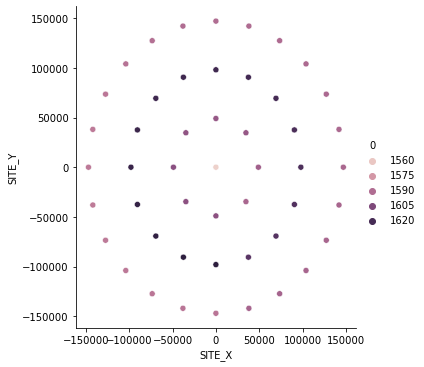

In [9]:
#Plot of coordinates according to layer height
import seaborn as sns
sns.relplot(
    data=DF4,
    x="SITE_X", y="SITE_Y", hue=DF4[0]
)

In [10]:
import matplotlib.pyplot as plt  # the Python plotting package
# - set gray colormap and nearest neighbor interpolation by default
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'
%matplotlib inline

In [11]:
# - set gray colormap and nearest neighbor interpolation by default
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'

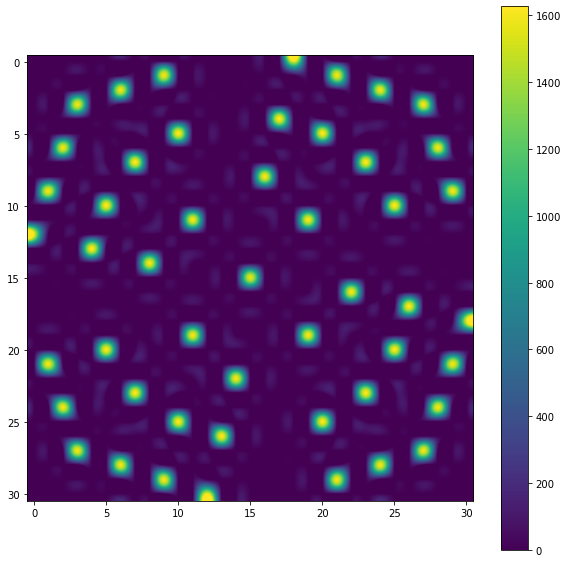

In [14]:
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

#Replacement of Euclidean coordinates to image coordinates
x = np.array(DF4['SITE_X'])
y = np.array(DF4['SITE_Y'])
v = np.array(DF4[0])

xdict = {x_: i for x_, i in zip(np.unique(x), range(len(np.unique(x))))}
ydict = {y_: i for y_, i in zip(np.unique(y), range(len(np.unique(y))))}

im = np.zeros([list(xdict.values())[-1]+1, list(ydict.values())[-1]+1])
for i in range(len(v)):
    im[xdict[x[i]], ydict[y[i]]] = v[i]

#Plot of the image with an interpoation the gives a square shape
cmap = 'viridis'
plt.figure(figsize = (10,10))
plt.imshow(im,  cmap='viridis', interpolation = 'lanczos')
plt.colorbar()